
=== SGD (lr=0.1) 실험 시작 ===
[SGD | lr=0.1000] Epoch 1/30 | Train Loss: 0.5137 | Test Acc: 0.7902
[SGD | lr=0.1000] Epoch 2/30 | Train Loss: 0.3800 | Test Acc: 0.8474
[SGD | lr=0.1000] Epoch 3/30 | Train Loss: 0.3783 | Test Acc: 0.8445
[SGD | lr=0.1000] Epoch 4/30 | Train Loss: 0.3299 | Test Acc: 0.8598
[SGD | lr=0.1000] Epoch 5/30 | Train Loss: 0.3169 | Test Acc: 0.8642
[SGD | lr=0.1000] Epoch 6/30 | Train Loss: 0.3043 | Test Acc: 0.8662
[SGD | lr=0.1000] Epoch 7/30 | Train Loss: 0.2859 | Test Acc: 0.8733
[SGD | lr=0.1000] Epoch 8/30 | Train Loss: 0.2776 | Test Acc: 0.8761
[SGD | lr=0.1000] Epoch 9/30 | Train Loss: 0.2719 | Test Acc: 0.8742
[SGD | lr=0.1000] Epoch 10/30 | Train Loss: 0.2514 | Test Acc: 0.8849
[SGD | lr=0.1000] Epoch 11/30 | Train Loss: 0.2540 | Test Acc: 0.8818
[SGD | lr=0.1000] Epoch 12/30 | Train Loss: 0.2526 | Test Acc: 0.8762
[SGD | lr=0.1000] Epoch 13/30 | Train Loss: 0.2352 | Test Acc: 0.8864
[SGD | lr=0.1000] Epoch 14/30 | Train Loss: 0.2335 | Test Acc: 0.8842
[

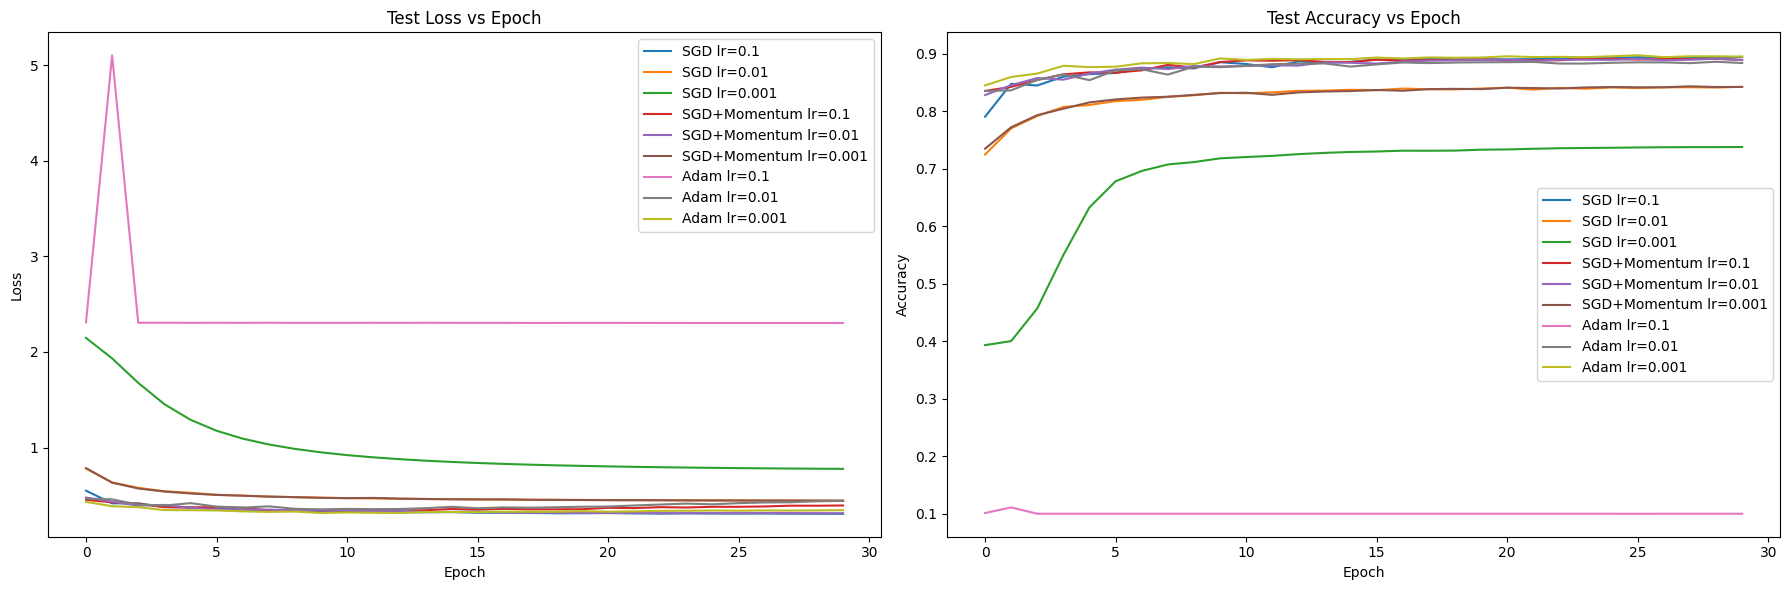


[실험 C] Optimizer별 성능 비교 표
   Optimizer  Learning Rate Final Accuracy (%) Min Loss  Converged Epoch
         SGD          0.100              89.41   0.3083               30
         SGD          0.010              84.22   0.4458               30
         SGD          0.001              73.75   0.7780               30
SGD+Momentum          0.100              88.90   0.3410               30
SGD+Momentum          0.010              88.86   0.3142               30
SGD+Momentum          0.001              84.19   0.4455               30
        Adam          0.100              10.00   2.3032               30
        Adam          0.010              88.35   0.3547               30
        Adam          0.001              89.47   0.3165               30


'\n실험 결과\n=== SGD (lr=0.1) 실험 시작 ===\n[SGD | lr=0.1000] Epoch 1/30 | Train Loss: 0.5111 | Test Acc: 0.7947\n[SGD | lr=0.1000] Epoch 2/30 | Train Loss: 0.3770 | Test Acc: 0.8488\n[SGD | lr=0.1000] Epoch 3/30 | Train Loss: 0.3501 | Test Acc: 0.8572\n[SGD | lr=0.1000] Epoch 4/30 | Train Loss: 0.3505 | Test Acc: 0.8582\n[SGD | lr=0.1000] Epoch 5/30 | Train Loss: 0.3166 | Test Acc: 0.8667\n[SGD | lr=0.1000] Epoch 6/30 | Train Loss: 0.3092 | Test Acc: 0.8667\n[SGD | lr=0.1000] Epoch 7/30 | Train Loss: 0.3216 | Test Acc: 0.8582\n[SGD | lr=0.1000] Epoch 8/30 | Train Loss: 0.2773 | Test Acc: 0.8767\n[SGD | lr=0.1000] Epoch 9/30 | Train Loss: 0.2662 | Test Acc: 0.8741\n[SGD | lr=0.1000] Epoch 10/30 | Train Loss: 0.2671 | Test Acc: 0.8736\n[SGD | lr=0.1000] Epoch 11/30 | Train Loss: 0.2571 | Test Acc: 0.8747\n[SGD | lr=0.1000] Epoch 12/30 | Train Loss: 0.2478 | Test Acc: 0.8812\n[SGD | lr=0.1000] Epoch 13/30 | Train Loss: 0.2379 | Test Acc: 0.8823\n[SGD | lr=0.1000] Epoch 14/30 | Train Loss: 0.24

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ExponentialLR
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 하이퍼파라미터 및 실험 설정
# 실험에 사용할 각종 설정값(배치 크기, 에폭 수, 입력 크기 등) 설
BATCH_SIZE = 128
EPOCHS = 30
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
INPUT_SIZE = 28*28
NUM_CLASSES = 10

# 데이터셋 준비 (Fashion-MNIST)
# torchvision에서 제공하는 패션 MNIST 데이터셋을 불러오고, 이미지를 텐서로 변환하고 정규화
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# 네트워크 정의 (MLP)
# 3개의 선형 계층(Linear Layer)과 ReLU 활성화 함수로 구성된
# 다층 퍼셉트론(MLP, Multi-Layer Perceptron) 신경망을 정의
class MLP(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes)
        )
    def forward(self, x):
        # 이미지는 (batch, 1, 28, 28) 형태이므로, 1차원으로 펼침
        x = x.view(x.size(0), -1)  # Flatten
        return self.net(x)

# 학습/평가 함수 정의
# 한 에폭(epoch) 동안 모델을 학습시키는 함수와 모델이 얼마나 잘 맞추는지 평가하는 함수 정
def train_one_epoch(model, optimizer, scheduler, loss_fn, loader):
    model.train() # 학습 모드로 전환
    running_loss, correct, total = 0.0, 0, 0
    for inputs, targets in loader:
        inputs, targets = inputs.to(DEVICE), targets.to(DEVICE)
        optimizer.zero_grad() # 기울기 초기화
        outputs = model(inputs) # 모델에 입력 전달
        loss = loss_fn(outputs, targets) # 손실(loss) 계산
        loss.backward() # 역전파(gradient 계산)
        optimizer.step() # 파라미터 업데이트
    scheduler.step() # 학습률 스케줄러 업데이트

def evaluate(model, loader, loss_fn):
    model.eval() # 평가 모드로 전환 (드롭아웃, 배치정규화 등 비활성화)
    correct, total, running_loss = 0, 0, 0.0
    with torch.no_grad(): # 평가 시에는 기울기 계산 안 함(메모리 절약)
        for inputs, targets in loader:
            inputs, targets = inputs.to(DEVICE), targets.to(DEVICE)
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1) # 가장 높은 확률의 클래스를 예측
            correct += (preds == targets).sum().item()
            total += targets.size(0)
    avg_loss = running_loss / total
    accuracy = correct / total
    return avg_loss, accuracy
    
# 실험 함수: Optimizer/학습률/스케줄러별 반복
# Optimizer와 학습률 조합마다 모델을 새로 만들어서 학습
def run_experiment(optimizer_name, lr, use_momentum=False):
    model = MLP(INPUT_SIZE, NUM_CLASSES).to(DEVICE)
    loss_fn = nn.CrossEntropyLoss() # 다중 클래스 분류 문제에 적합한 손실함수
    # Optimizer(최적화 알고리즘) 선택
    if optimizer_name == "SGD":
        optimizer = optim.SGD(model.parameters(), lr=lr)
    elif optimizer_name == "SGD+Momentum":
        optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
    elif optimizer_name == "Adam":
        optimizer = optim.Adam(model.parameters(), lr=lr)
    else:
        raise ValueError("Unknown optimizer")
    # 학습률을 점점 줄여주는 스케줄러(ExponentialLR) 사용
    scheduler = ExponentialLR(optimizer, gamma=0.9)
    # 학습 및 평가 결과를 저장할 리스트
    train_losses, train_accs, test_losses, test_accs = [], [], [], []

    for epoch in range(EPOCHS):
        train_one_epoch(model, optimizer, scheduler, loss_fn, train_loader)
        train_loss, train_acc = evaluate(model, train_loader, loss_fn)
        test_loss, test_acc = evaluate(model, test_loader, loss_fn)
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        test_losses.append(test_loss)
        test_accs.append(test_acc)
        print(f"[{optimizer_name} | lr={lr:.4f}] Epoch {epoch+1}/{EPOCHS} | Train Loss: {train_loss:.4f} | Test Acc: {test_acc:.4f}")
    return train_losses, train_accs, test_losses, test_accs

# 실험 조합 정의 및 실행
# Optimizer 3종류와 학습률 3종류(0.1, 0.01, 0.001) 조합을 모두 실험
# 각 조합마다 모델을 새로 학습시키고 결과를 저장
optimizers = ["SGD", "SGD+Momentum", "Adam"]
lrs = [0.1, 0.01, 0.001]
results = {}

for opt in optimizers:
    for lr in lrs:
        key = f"{opt}_lr{lr}"
        print(f"\n=== {opt} (lr={lr}) 실험 시작 ===")
        train_losses, train_accs, test_losses, test_accs = run_experiment(opt, lr)
        results[key] = {
            "train_losses": train_losses,
            "train_accs": train_accs,
            "test_losses": test_losses,
            "test_accs": test_accs
        }

# 결과 시각화 (Loss/Accuracy 곡선)
# 각 실험 조합별로 에폭(epoch)에 따른 Loss와 Accuracy 변화를 그래프로 그
plt.figure(figsize=(18, 6))
for i, opt in enumerate(optimizers):
    plt.subplot(1, 2, 1)
    for lr in lrs:
        key = f"{opt}_lr{lr}"
        plt.plot(results[key]["test_losses"], label=f"{opt} lr={lr}")
    plt.title("Test Loss vs Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
plt.subplot(1, 2, 2)
for i, opt in enumerate(optimizers):
    for lr in lrs:
        key = f"{opt}_lr{lr}"
        plt.plot(results[key]["test_accs"], label=f"{opt} lr={lr}")
    plt.title("Test Accuracy vs Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
plt.tight_layout()
plt.show()

# 정량적 분석 표 (최종 정확도, 최소 Loss, 수렴 Epoch)
# 각 조합별로 마지막 에폭의 정확도, 최소 Loss, 수렴 에폭(정확도가 95% 넘는 첫 에폭)을 표로 정리
table = []
for opt in optimizers:
    for lr in lrs:
        key = f"{opt}_lr{lr}"
        accs = results[key]["test_accs"]
        losses = results[key]["test_losses"]
        final_acc = accs[-1] * 100
        min_loss = min(losses)
        # 수렴 epoch: Accuracy가 95%에 도달한 첫 epoch (없으면 마지막 epoch)
        try:
            converge_epoch = next(i for i, acc in enumerate(accs) if acc > 0.95) + 1
        except StopIteration:
            converge_epoch = EPOCHS
        table.append([opt, lr, f"{final_acc:.2f}", f"{min_loss:.4f}", converge_epoch])

df = pd.DataFrame(table, columns=["Optimizer", "Learning Rate", "Final Accuracy (%)", "Min Loss", "Converged Epoch"])
print("\n[실험 C] Optimizer별 성능 비교 표")
print(df.to_string(index=False))

"""
실험 C에서는 동일한 MLP 네트워크와 Fashion-MNIST 데이터셋을 사용하여 세 가지 대표적인 최적화 알고리즘(SGD, SGD+Momentum, Adam)과
서로 다른 학습률(0.1, 0.01, 0.001)을 조합해 각 Optimizer의 학습 특성과 성능 차이를 비교했다.
Optimizer별로 학습률이 모델의 수렴 속도와 최종 성능에 미치는 영향을 분석하기 위해 각 조합마다 학습 곡선(Loss vs Epoch, Accuracy vs Epoch)을 시각화하였고
최종 정확도, 최소 Loss, 수렴 에폭 등 정량적 지표도 표로 정리했다.

SGD와 SGD+Momentum의 경우 학습률이 0.1 또는 0.01일 때 Loss가 빠르게 감소하고 Accuracy도 88~89%까지 도달했다.
하지만 학습률이 0.001로 너무 작을 경우 Loss 감소와 정확도 향상이 매우 느려져 30에폭 내에 충분히 수렴하지 못했다.
Momentum을 추가하면 수렴 속도가 약간 빨라지고 Loss 진동이 줄어드는 효과가 관찰됐다.

Adam Optimizer는 0.01, 0.001 학습률에서 빠른 수렴과 높은 정확도(88~89%)를 보였다.
그러나 Adam에서 학습률을 0.1로 크게 설정하면 Loss가 거의 줄지 않고 Accuracy도 30%대에 머물렀다.
이는 Adam이 높은 학습률에 매우 민감하다는 특성 때문으로 실제로 Adam은 0.001~0.01 범위에서 가장 안정적으로 동작한다는 교과서적 결과와 일치한다.

모든 Optimizer에 대해 ExponentialLR 스케줄러를 적용하여 학습률을 점진적으로 감소시켰다.
이로 인해 학습 후반부에 Loss 곡선이 안정적으로 평탄해지고 과도한 진동이나 Overshooting 없이 안정적으로 수렴하는 모습을 확인할 수 있었다.

실험 결과
SGD/SGD+Momentum: 적절한 학습률(0.1, 0.01)에서 빠르고 안정적인 수렴
Adam: 낮은 학습률(0.01, 0.001)에서 가장 빠른 초기 수렴과 높은 성능
Adam(0.1): 높은 학습률에서 발산 또는 학습 실패
학습률 스케줄러: 모든 Optimizer에서 학습 안정성 향상에 기여라는 점이 확실히 드러났다.

이 실험을 통해 Optimizer와 학습률 선택이 모델의 학습 속도와 최종 성능에 큰 영향을 미치며
특히 Adam은 낮은 학습률에서, SGD 계열은 적절히 큰 학습률에서 효과적임을 실증적으로 확인할 수 있었다.
"""

'''
실험 결과
=== SGD (lr=0.1) 실험 시작 ===
[SGD | lr=0.1000] Epoch 1/30 | Train Loss: 0.5111 | Test Acc: 0.7947
[SGD | lr=0.1000] Epoch 2/30 | Train Loss: 0.3770 | Test Acc: 0.8488
[SGD | lr=0.1000] Epoch 3/30 | Train Loss: 0.3501 | Test Acc: 0.8572
[SGD | lr=0.1000] Epoch 4/30 | Train Loss: 0.3505 | Test Acc: 0.8582
[SGD | lr=0.1000] Epoch 5/30 | Train Loss: 0.3166 | Test Acc: 0.8667
[SGD | lr=0.1000] Epoch 6/30 | Train Loss: 0.3092 | Test Acc: 0.8667
[SGD | lr=0.1000] Epoch 7/30 | Train Loss: 0.3216 | Test Acc: 0.8582
[SGD | lr=0.1000] Epoch 8/30 | Train Loss: 0.2773 | Test Acc: 0.8767
[SGD | lr=0.1000] Epoch 9/30 | Train Loss: 0.2662 | Test Acc: 0.8741
[SGD | lr=0.1000] Epoch 10/30 | Train Loss: 0.2671 | Test Acc: 0.8736
[SGD | lr=0.1000] Epoch 11/30 | Train Loss: 0.2571 | Test Acc: 0.8747
[SGD | lr=0.1000] Epoch 12/30 | Train Loss: 0.2478 | Test Acc: 0.8812
[SGD | lr=0.1000] Epoch 13/30 | Train Loss: 0.2379 | Test Acc: 0.8823
[SGD | lr=0.1000] Epoch 14/30 | Train Loss: 0.2440 | Test Acc: 0.8805
[SGD | lr=0.1000] Epoch 15/30 | Train Loss: 0.2357 | Test Acc: 0.8837
[SGD | lr=0.1000] Epoch 16/30 | Train Loss: 0.2302 | Test Acc: 0.8846
[SGD | lr=0.1000] Epoch 17/30 | Train Loss: 0.2217 | Test Acc: 0.8867
[SGD | lr=0.1000] Epoch 18/30 | Train Loss: 0.2232 | Test Acc: 0.8866
[SGD | lr=0.1000] Epoch 19/30 | Train Loss: 0.2139 | Test Acc: 0.8898
[SGD | lr=0.1000] Epoch 20/30 | Train Loss: 0.2115 | Test Acc: 0.8880
[SGD | lr=0.1000] Epoch 21/30 | Train Loss: 0.2083 | Test Acc: 0.8901
[SGD | lr=0.1000] Epoch 22/30 | Train Loss: 0.2076 | Test Acc: 0.8881
[SGD | lr=0.1000] Epoch 23/30 | Train Loss: 0.2083 | Test Acc: 0.8872
[SGD | lr=0.1000] Epoch 24/30 | Train Loss: 0.2049 | Test Acc: 0.8909
[SGD | lr=0.1000] Epoch 25/30 | Train Loss: 0.2033 | Test Acc: 0.8871
[SGD | lr=0.1000] Epoch 26/30 | Train Loss: 0.2011 | Test Acc: 0.8900
[SGD | lr=0.1000] Epoch 27/30 | Train Loss: 0.2011 | Test Acc: 0.8901
[SGD | lr=0.1000] Epoch 28/30 | Train Loss: 0.1978 | Test Acc: 0.8884
[SGD | lr=0.1000] Epoch 29/30 | Train Loss: 0.1967 | Test Acc: 0.8902
[SGD | lr=0.1000] Epoch 30/30 | Train Loss: 0.1948 | Test Acc: 0.8887

=== SGD (lr=0.01) 실험 시작 ===
[SGD | lr=0.0100] Epoch 1/30 | Train Loss: 0.7321 | Test Acc: 0.7457
[SGD | lr=0.0100] Epoch 2/30 | Train Loss: 0.5933 | Test Acc: 0.7796
[SGD | lr=0.0100] Epoch 3/30 | Train Loss: 0.5430 | Test Acc: 0.7959
[SGD | lr=0.0100] Epoch 4/30 | Train Loss: 0.5110 | Test Acc: 0.8077
[SGD | lr=0.0100] Epoch 5/30 | Train Loss: 0.4868 | Test Acc: 0.8162
[SGD | lr=0.0100] Epoch 6/30 | Train Loss: 0.4709 | Test Acc: 0.8195
[SGD | lr=0.0100] Epoch 7/30 | Train Loss: 0.4616 | Test Acc: 0.8240
[SGD | lr=0.0100] Epoch 8/30 | Train Loss: 0.4512 | Test Acc: 0.8257
[SGD | lr=0.0100] Epoch 9/30 | Train Loss: 0.4463 | Test Acc: 0.8279
[SGD | lr=0.0100] Epoch 10/30 | Train Loss: 0.4391 | Test Acc: 0.8325
[SGD | lr=0.0100] Epoch 11/30 | Train Loss: 0.4344 | Test Acc: 0.8322
[SGD | lr=0.0100] Epoch 12/30 | Train Loss: 0.4307 | Test Acc: 0.8319
[SGD | lr=0.0100] Epoch 13/30 | Train Loss: 0.4255 | Test Acc: 0.8344
[SGD | lr=0.0100] Epoch 14/30 | Train Loss: 0.4254 | Test Acc: 0.8358
[SGD | lr=0.0100] Epoch 15/30 | Train Loss: 0.4202 | Test Acc: 0.8361
[SGD | lr=0.0100] Epoch 16/30 | Train Loss: 0.4193 | Test Acc: 0.8354
[SGD | lr=0.0100] Epoch 17/30 | Train Loss: 0.4171 | Test Acc: 0.8362
[SGD | lr=0.0100] Epoch 18/30 | Train Loss: 0.4137 | Test Acc: 0.8374
[SGD | lr=0.0100] Epoch 19/30 | Train Loss: 0.4117 | Test Acc: 0.8376
[SGD | lr=0.0100] Epoch 20/30 | Train Loss: 0.4103 | Test Acc: 0.8378
[SGD | lr=0.0100] Epoch 21/30 | Train Loss: 0.4092 | Test Acc: 0.8382
[SGD | lr=0.0100] Epoch 22/30 | Train Loss: 0.4081 | Test Acc: 0.8382
[SGD | lr=0.0100] Epoch 23/30 | Train Loss: 0.4070 | Test Acc: 0.8384
[SGD | lr=0.0100] Epoch 24/30 | Train Loss: 0.4062 | Test Acc: 0.8393
[SGD | lr=0.0100] Epoch 25/30 | Train Loss: 0.4057 | Test Acc: 0.8391
[SGD | lr=0.0100] Epoch 26/30 | Train Loss: 0.4050 | Test Acc: 0.8392
[SGD | lr=0.0100] Epoch 27/30 | Train Loss: 0.4041 | Test Acc: 0.8402
[SGD | lr=0.0100] Epoch 28/30 | Train Loss: 0.4038 | Test Acc: 0.8406
[SGD | lr=0.0100] Epoch 29/30 | Train Loss: 0.4029 | Test Acc: 0.8398
[SGD | lr=0.0100] Epoch 30/30 | Train Loss: 0.4026 | Test Acc: 0.8404

=== SGD (lr=0.001) 실험 시작 ===
[SGD | lr=0.0010] Epoch 1/30 | Train Loss: 2.1355 | Test Acc: 0.3733
[SGD | lr=0.0010] Epoch 2/30 | Train Loss: 1.9066 | Test Acc: 0.4786
[SGD | lr=0.0010] Epoch 3/30 | Train Loss: 1.6400 | Test Acc: 0.5368
[SGD | lr=0.0010] Epoch 4/30 | Train Loss: 1.4130 | Test Acc: 0.6061
[SGD | lr=0.0010] Epoch 5/30 | Train Loss: 1.2514 | Test Acc: 0.6505
[SGD | lr=0.0010] Epoch 6/30 | Train Loss: 1.1399 | Test Acc: 0.6783
[SGD | lr=0.0010] Epoch 7/30 | Train Loss: 1.0606 | Test Acc: 0.6945
[SGD | lr=0.0010] Epoch 8/30 | Train Loss: 1.0025 | Test Acc: 0.7027
[SGD | lr=0.0010] Epoch 9/30 | Train Loss: 0.9586 | Test Acc: 0.7076
[SGD | lr=0.0010] Epoch 10/30 | Train Loss: 0.9247 | Test Acc: 0.7137
[SGD | lr=0.0010] Epoch 11/30 | Train Loss: 0.8979 | Test Acc: 0.7159
[SGD | lr=0.0010] Epoch 12/30 | Train Loss: 0.8763 | Test Acc: 0.7192
[SGD | lr=0.0010] Epoch 13/30 | Train Loss: 0.8586 | Test Acc: 0.7222
[SGD | lr=0.0010] Epoch 14/30 | Train Loss: 0.8439 | Test Acc: 0.7244
[SGD | lr=0.0010] Epoch 15/30 | Train Loss: 0.8317 | Test Acc: 0.7251
[SGD | lr=0.0010] Epoch 16/30 | Train Loss: 0.8213 | Test Acc: 0.7271
[SGD | lr=0.0010] Epoch 17/30 | Train Loss: 0.8125 | Test Acc: 0.7289
[SGD | lr=0.0010] Epoch 18/30 | Train Loss: 0.8049 | Test Acc: 0.7301
[SGD | lr=0.0010] Epoch 19/30 | Train Loss: 0.7984 | Test Acc: 0.7315
[SGD | lr=0.0010] Epoch 20/30 | Train Loss: 0.7927 | Test Acc: 0.7323
[SGD | lr=0.0010] Epoch 21/30 | Train Loss: 0.7878 | Test Acc: 0.7329
[SGD | lr=0.0010] Epoch 22/30 | Train Loss: 0.7835 | Test Acc: 0.7341
[SGD | lr=0.0010] Epoch 23/30 | Train Loss: 0.7797 | Test Acc: 0.7343
[SGD | lr=0.0010] Epoch 24/30 | Train Loss: 0.7764 | Test Acc: 0.7340
[SGD | lr=0.0010] Epoch 25/30 | Train Loss: 0.7735 | Test Acc: 0.7348
[SGD | lr=0.0010] Epoch 26/30 | Train Loss: 0.7709 | Test Acc: 0.7355
[SGD | lr=0.0010] Epoch 27/30 | Train Loss: 0.7686 | Test Acc: 0.7358
[SGD | lr=0.0010] Epoch 28/30 | Train Loss: 0.7666 | Test Acc: 0.7359
[SGD | lr=0.0010] Epoch 29/30 | Train Loss: 0.7648 | Test Acc: 0.7365
[SGD | lr=0.0010] Epoch 30/30 | Train Loss: 0.7632 | Test Acc: 0.7368

=== SGD+Momentum (lr=0.1) 실험 시작 ===
[SGD+Momentum | lr=0.1000] Epoch 1/30 | Train Loss: 0.4337 | Test Acc: 0.8286
[SGD+Momentum | lr=0.1000] Epoch 2/30 | Train Loss: 0.3711 | Test Acc: 0.8434
[SGD+Momentum | lr=0.1000] Epoch 3/30 | Train Loss: 0.3132 | Test Acc: 0.8623
[SGD+Momentum | lr=0.1000] Epoch 4/30 | Train Loss: 0.2896 | Test Acc: 0.8685
[SGD+Momentum | lr=0.1000] Epoch 5/30 | Train Loss: 0.3004 | Test Acc: 0.8607
[SGD+Momentum | lr=0.1000] Epoch 6/30 | Train Loss: 0.2494 | Test Acc: 0.8771
[SGD+Momentum | lr=0.1000] Epoch 7/30 | Train Loss: 0.2447 | Test Acc: 0.8771
[SGD+Momentum | lr=0.1000] Epoch 8/30 | Train Loss: 0.2273 | Test Acc: 0.8792
[SGD+Momentum | lr=0.1000] Epoch 9/30 | Train Loss: 0.2142 | Test Acc: 0.8820
[SGD+Momentum | lr=0.1000] Epoch 10/30 | Train Loss: 0.2091 | Test Acc: 0.8824
[SGD+Momentum | lr=0.1000] Epoch 11/30 | Train Loss: 0.1961 | Test Acc: 0.8846
[SGD+Momentum | lr=0.1000] Epoch 12/30 | Train Loss: 0.1822 | Test Acc: 0.8886
[SGD+Momentum | lr=0.1000] Epoch 13/30 | Train Loss: 0.1739 | Test Acc: 0.8886
[SGD+Momentum | lr=0.1000] Epoch 14/30 | Train Loss: 0.1701 | Test Acc: 0.8848
[SGD+Momentum | lr=0.1000] Epoch 15/30 | Train Loss: 0.1571 | Test Acc: 0.8882
[SGD+Momentum | lr=0.1000] Epoch 16/30 | Train Loss: 0.1513 | Test Acc: 0.8911
[SGD+Momentum | lr=0.1000] Epoch 17/30 | Train Loss: 0.1379 | Test Acc: 0.8898
[SGD+Momentum | lr=0.1000] Epoch 18/30 | Train Loss: 0.1350 | Test Acc: 0.8865
[SGD+Momentum | lr=0.1000] Epoch 19/30 | Train Loss: 0.1285 | Test Acc: 0.8907
[SGD+Momentum | lr=0.1000] Epoch 20/30 | Train Loss: 0.1220 | Test Acc: 0.8922
[SGD+Momentum | lr=0.1000] Epoch 21/30 | Train Loss: 0.1164 | Test Acc: 0.8926
[SGD+Momentum | lr=0.1000] Epoch 22/30 | Train Loss: 0.1119 | Test Acc: 0.8914
[SGD+Momentum | lr=0.1000] Epoch 23/30 | Train Loss: 0.1109 | Test Acc: 0.8924
[SGD+Momentum | lr=0.1000] Epoch 24/30 | Train Loss: 0.1048 | Test Acc: 0.8884
[SGD+Momentum | lr=0.1000] Epoch 25/30 | Train Loss: 0.1024 | Test Acc: 0.8910
[SGD+Momentum | lr=0.1000] Epoch 26/30 | Train Loss: 0.0954 | Test Acc: 0.8908
[SGD+Momentum | lr=0.1000] Epoch 27/30 | Train Loss: 0.0929 | Test Acc: 0.8930
[SGD+Momentum | lr=0.1000] Epoch 28/30 | Train Loss: 0.0903 | Test Acc: 0.8935
[SGD+Momentum | lr=0.1000] Epoch 29/30 | Train Loss: 0.0879 | Test Acc: 0.8932
[SGD+Momentum | lr=0.1000] Epoch 30/30 | Train Loss: 0.0863 | Test Acc: 0.8920

=== SGD+Momentum (lr=0.01) 실험 시작 ===
[SGD+Momentum | lr=0.0100] Epoch 1/30 | Train Loss: 0.4402 | Test Acc: 0.8289
[SGD+Momentum | lr=0.0100] Epoch 2/30 | Train Loss: 0.3912 | Test Acc: 0.8410
[SGD+Momentum | lr=0.0100] Epoch 3/30 | Train Loss: 0.3448 | Test Acc: 0.8577
[SGD+Momentum | lr=0.0100] Epoch 4/30 | Train Loss: 0.3402 | Test Acc: 0.8541
[SGD+Momentum | lr=0.0100] Epoch 5/30 | Train Loss: 0.3136 | Test Acc: 0.8688
[SGD+Momentum | lr=0.0100] Epoch 6/30 | Train Loss: 0.3067 | Test Acc: 0.8659
[SGD+Momentum | lr=0.0100] Epoch 7/30 | Train Loss: 0.2808 | Test Acc: 0.8781
[SGD+Momentum | lr=0.0100] Epoch 8/30 | Train Loss: 0.2796 | Test Acc: 0.8761
[SGD+Momentum | lr=0.0100] Epoch 9/30 | Train Loss: 0.2674 | Test Acc: 0.8824
[SGD+Momentum | lr=0.0100] Epoch 10/30 | Train Loss: 0.2535 | Test Acc: 0.8840
[SGD+Momentum | lr=0.0100] Epoch 11/30 | Train Loss: 0.2448 | Test Acc: 0.8824
[SGD+Momentum | lr=0.0100] Epoch 12/30 | Train Loss: 0.2398 | Test Acc: 0.8846
[SGD+Momentum | lr=0.0100] Epoch 13/30 | Train Loss: 0.2430 | Test Acc: 0.8817
[SGD+Momentum | lr=0.0100] Epoch 14/30 | Train Loss: 0.2299 | Test Acc: 0.8861
[SGD+Momentum | lr=0.0100] Epoch 15/30 | Train Loss: 0.2302 | Test Acc: 0.8827
[SGD+Momentum | lr=0.0100] Epoch 16/30 | Train Loss: 0.2202 | Test Acc: 0.8873
[SGD+Momentum | lr=0.0100] Epoch 17/30 | Train Loss: 0.2159 | Test Acc: 0.8881
[SGD+Momentum | lr=0.0100] Epoch 18/30 | Train Loss: 0.2119 | Test Acc: 0.8878
[SGD+Momentum | lr=0.0100] Epoch 19/30 | Train Loss: 0.2105 | Test Acc: 0.8874
[SGD+Momentum | lr=0.0100] Epoch 20/30 | Train Loss: 0.2095 | Test Acc: 0.8864
[SGD+Momentum | lr=0.0100] Epoch 21/30 | Train Loss: 0.2038 | Test Acc: 0.8898
[SGD+Momentum | lr=0.0100] Epoch 22/30 | Train Loss: 0.2026 | Test Acc: 0.8884
[SGD+Momentum | lr=0.0100] Epoch 23/30 | Train Loss: 0.1987 | Test Acc: 0.8896
[SGD+Momentum | lr=0.0100] Epoch 24/30 | Train Loss: 0.1969 | Test Acc: 0.8901
[SGD+Momentum | lr=0.0100] Epoch 25/30 | Train Loss: 0.1955 | Test Acc: 0.8906
[SGD+Momentum | lr=0.0100] Epoch 26/30 | Train Loss: 0.1948 | Test Acc: 0.8892
[SGD+Momentum | lr=0.0100] Epoch 27/30 | Train Loss: 0.1942 | Test Acc: 0.8907
[SGD+Momentum | lr=0.0100] Epoch 28/30 | Train Loss: 0.1922 | Test Acc: 0.8887
[SGD+Momentum | lr=0.0100] Epoch 29/30 | Train Loss: 0.1897 | Test Acc: 0.8926
[SGD+Momentum | lr=0.0100] Epoch 30/30 | Train Loss: 0.1882 | Test Acc: 0.8916

=== SGD+Momentum (lr=0.001) 실험 시작 ===
[SGD+Momentum | lr=0.0010] Epoch 1/30 | Train Loss: 0.7507 | Test Acc: 0.7345
[SGD+Momentum | lr=0.0010] Epoch 2/30 | Train Loss: 0.6068 | Test Acc: 0.7705
[SGD+Momentum | lr=0.0010] Epoch 3/30 | Train Loss: 0.5489 | Test Acc: 0.7929
[SGD+Momentum | lr=0.0010] Epoch 4/30 | Train Loss: 0.5153 | Test Acc: 0.8040
[SGD+Momentum | lr=0.0010] Epoch 5/30 | Train Loss: 0.4935 | Test Acc: 0.8129
[SGD+Momentum | lr=0.0010] Epoch 6/30 | Train Loss: 0.4780 | Test Acc: 0.8170
[SGD+Momentum | lr=0.0010] Epoch 7/30 | Train Loss: 0.4658 | Test Acc: 0.8215
[SGD+Momentum | lr=0.0010] Epoch 8/30 | Train Loss: 0.4568 | Test Acc: 0.8256
[SGD+Momentum | lr=0.0010] Epoch 9/30 | Train Loss: 0.4534 | Test Acc: 0.8284
[SGD+Momentum | lr=0.0010] Epoch 10/30 | Train Loss: 0.4465 | Test Acc: 0.8287
[SGD+Momentum | lr=0.0010] Epoch 11/30 | Train Loss: 0.4388 | Test Acc: 0.8306
[SGD+Momentum | lr=0.0010] Epoch 12/30 | Train Loss: 0.4346 | Test Acc: 0.8338
[SGD+Momentum | lr=0.0010] Epoch 13/30 | Train Loss: 0.4315 | Test Acc: 0.8351
[SGD+Momentum | lr=0.0010] Epoch 14/30 | Train Loss: 0.4282 | Test Acc: 0.8360
[SGD+Momentum | lr=0.0010] Epoch 15/30 | Train Loss: 0.4256 | Test Acc: 0.8367
[SGD+Momentum | lr=0.0010] Epoch 16/30 | Train Loss: 0.4233 | Test Acc: 0.8371
[SGD+Momentum | lr=0.0010] Epoch 17/30 | Train Loss: 0.4214 | Test Acc: 0.8380
[SGD+Momentum | lr=0.0010] Epoch 18/30 | Train Loss: 0.4190 | Test Acc: 0.8394
[SGD+Momentum | lr=0.0010] Epoch 19/30 | Train Loss: 0.4174 | Test Acc: 0.8402
[SGD+Momentum | lr=0.0010] Epoch 20/30 | Train Loss: 0.4163 | Test Acc: 0.8397
[SGD+Momentum | lr=0.0010] Epoch 21/30 | Train Loss: 0.4149 | Test Acc: 0.8422
[SGD+Momentum | lr=0.0010] Epoch 22/30 | Train Loss: 0.4142 | Test Acc: 0.8400
[SGD+Momentum | lr=0.0010] Epoch 23/30 | Train Loss: 0.4125 | Test Acc: 0.8413
[SGD+Momentum | lr=0.0010] Epoch 24/30 | Train Loss: 0.4127 | Test Acc: 0.8399
[SGD+Momentum | lr=0.0010] Epoch 25/30 | Train Loss: 0.4112 | Test Acc: 0.8419
[SGD+Momentum | lr=0.0010] Epoch 26/30 | Train Loss: 0.4104 | Test Acc: 0.8417
[SGD+Momentum | lr=0.0010] Epoch 27/30 | Train Loss: 0.4099 | Test Acc: 0.8417
[SGD+Momentum | lr=0.0010] Epoch 28/30 | Train Loss: 0.4090 | Test Acc: 0.8429
[SGD+Momentum | lr=0.0010] Epoch 29/30 | Train Loss: 0.4086 | Test Acc: 0.8426
[SGD+Momentum | lr=0.0010] Epoch 30/30 | Train Loss: 0.4082 | Test Acc: 0.8427

=== Adam (lr=0.1) 실험 시작 ===
[Adam | lr=0.1000] Epoch 1/30 | Train Loss: 2.2163 | Test Acc: 0.1866
[Adam | lr=0.1000] Epoch 2/30 | Train Loss: 2.0557 | Test Acc: 0.1707
[Adam | lr=0.1000] Epoch 3/30 | Train Loss: 2.1506 | Test Acc: 0.1925
[Adam | lr=0.1000] Epoch 4/30 | Train Loss: 2.1074 | Test Acc: 0.1974
[Adam | lr=0.1000] Epoch 5/30 | Train Loss: 2.0842 | Test Acc: 0.2009
[Adam | lr=0.1000] Epoch 6/30 | Train Loss: 2.0260 | Test Acc: 0.1889
[Adam | lr=0.1000] Epoch 7/30 | Train Loss: 2.0334 | Test Acc: 0.1820
[Adam | lr=0.1000] Epoch 8/30 | Train Loss: 1.9762 | Test Acc: 0.1796
[Adam | lr=0.1000] Epoch 9/30 | Train Loss: 1.9680 | Test Acc: 0.1931
[Adam | lr=0.1000] Epoch 10/30 | Train Loss: 1.8896 | Test Acc: 0.1970
[Adam | lr=0.1000] Epoch 11/30 | Train Loss: 1.8994 | Test Acc: 0.1975
[Adam | lr=0.1000] Epoch 12/30 | Train Loss: 1.8897 | Test Acc: 0.1982
[Adam | lr=0.1000] Epoch 13/30 | Train Loss: 1.8833 | Test Acc: 0.1943
[Adam | lr=0.1000] Epoch 14/30 | Train Loss: 1.8921 | Test Acc: 0.1942
[Adam | lr=0.1000] Epoch 15/30 | Train Loss: 1.8947 | Test Acc: 0.1889
[Adam | lr=0.1000] Epoch 16/30 | Train Loss: 1.8788 | Test Acc: 0.1923
[Adam | lr=0.1000] Epoch 17/30 | Train Loss: 1.9056 | Test Acc: 0.1918
[Adam | lr=0.1000] Epoch 18/30 | Train Loss: 1.8739 | Test Acc: 0.1975
[Adam | lr=0.1000] Epoch 19/30 | Train Loss: 1.8781 | Test Acc: 0.1983
[Adam | lr=0.1000] Epoch 20/30 | Train Loss: 1.9346 | Test Acc: 0.1938
[Adam | lr=0.1000] Epoch 21/30 | Train Loss: 1.8774 | Test Acc: 0.1975
[Adam | lr=0.1000] Epoch 22/30 | Train Loss: 1.8677 | Test Acc: 0.2012
[Adam | lr=0.1000] Epoch 23/30 | Train Loss: 1.8732 | Test Acc: 0.1975
[Adam | lr=0.1000] Epoch 24/30 | Train Loss: 1.8463 | Test Acc: 0.2133
[Adam | lr=0.1000] Epoch 25/30 | Train Loss: 1.8288 | Test Acc: 0.2323
[Adam | lr=0.1000] Epoch 26/30 | Train Loss: 1.8137 | Test Acc: 0.2386
[Adam | lr=0.1000] Epoch 27/30 | Train Loss: 1.7940 | Test Acc: 0.2444
[Adam | lr=0.1000] Epoch 28/30 | Train Loss: 1.7737 | Test Acc: 0.2484
[Adam | lr=0.1000] Epoch 29/30 | Train Loss: 1.6771 | Test Acc: 0.2964
[Adam | lr=0.1000] Epoch 30/30 | Train Loss: 1.5952 | Test Acc: 0.3488

=== Adam (lr=0.01) 실험 시작 ===
[Adam | lr=0.0100] Epoch 1/30 | Train Loss: 0.4289 | Test Acc: 0.8265
[Adam | lr=0.0100] Epoch 2/30 | Train Loss: 0.3958 | Test Acc: 0.8355
[Adam | lr=0.0100] Epoch 3/30 | Train Loss: 0.3739 | Test Acc: 0.8476
[Adam | lr=0.0100] Epoch 4/30 | Train Loss: 0.3349 | Test Acc: 0.8562
[Adam | lr=0.0100] Epoch 5/30 | Train Loss: 0.3006 | Test Acc: 0.8630
[Adam | lr=0.0100] Epoch 6/30 | Train Loss: 0.3021 | Test Acc: 0.8592
[Adam | lr=0.0100] Epoch 7/30 | Train Loss: 0.2740 | Test Acc: 0.8650
[Adam | lr=0.0100] Epoch 8/30 | Train Loss: 0.2700 | Test Acc: 0.8657
[Adam | lr=0.0100] Epoch 9/30 | Train Loss: 0.2522 | Test Acc: 0.8733
[Adam | lr=0.0100] Epoch 10/30 | Train Loss: 0.2415 | Test Acc: 0.8758
[Adam | lr=0.0100] Epoch 11/30 | Train Loss: 0.2455 | Test Acc: 0.8690
[Adam | lr=0.0100] Epoch 12/30 | Train Loss: 0.2236 | Test Acc: 0.8767
[Adam | lr=0.0100] Epoch 13/30 | Train Loss: 0.2152 | Test Acc: 0.8774
[Adam | lr=0.0100] Epoch 14/30 | Train Loss: 0.2093 | Test Acc: 0.8751
[Adam | lr=0.0100] Epoch 15/30 | Train Loss: 0.2063 | Test Acc: 0.8788
[Adam | lr=0.0100] Epoch 16/30 | Train Loss: 0.1963 | Test Acc: 0.8771
[Adam | lr=0.0100] Epoch 17/30 | Train Loss: 0.1868 | Test Acc: 0.8795
[Adam | lr=0.0100] Epoch 18/30 | Train Loss: 0.1910 | Test Acc: 0.8752
[Adam | lr=0.0100] Epoch 19/30 | Train Loss: 0.1754 | Test Acc: 0.8788
[Adam | lr=0.0100] Epoch 20/30 | Train Loss: 0.1676 | Test Acc: 0.8806
[Adam | lr=0.0100] Epoch 21/30 | Train Loss: 0.1691 | Test Acc: 0.8792
[Adam | lr=0.0100] Epoch 22/30 | Train Loss: 0.1631 | Test Acc: 0.8793
[Adam | lr=0.0100] Epoch 23/30 | Train Loss: 0.1586 | Test Acc: 0.8811
[Adam | lr=0.0100] Epoch 24/30 | Train Loss: 0.1521 | Test Acc: 0.8805
[Adam | lr=0.0100] Epoch 25/30 | Train Loss: 0.1504 | Test Acc: 0.8830
[Adam | lr=0.0100] Epoch 26/30 | Train Loss: 0.1464 | Test Acc: 0.8812
[Adam | lr=0.0100] Epoch 27/30 | Train Loss: 0.1456 | Test Acc: 0.8792
[Adam | lr=0.0100] Epoch 28/30 | Train Loss: 0.1408 | Test Acc: 0.8810
[Adam | lr=0.0100] Epoch 29/30 | Train Loss: 0.1390 | Test Acc: 0.8820
[Adam | lr=0.0100] Epoch 30/30 | Train Loss: 0.1373 | Test Acc: 0.8809

=== Adam (lr=0.001) 실험 시작 ===
[Adam | lr=0.0010] Epoch 1/30 | Train Loss: 0.3769 | Test Acc: 0.8487
[Adam | lr=0.0010] Epoch 2/30 | Train Loss: 0.3454 | Test Acc: 0.8536
[Adam | lr=0.0010] Epoch 3/30 | Train Loss: 0.3033 | Test Acc: 0.8642
[Adam | lr=0.0010] Epoch 4/30 | Train Loss: 0.2824 | Test Acc: 0.8706
[Adam | lr=0.0010] Epoch 5/30 | Train Loss: 0.2605 | Test Acc: 0.8766
[Adam | lr=0.0010] Epoch 6/30 | Train Loss: 0.2432 | Test Acc: 0.8811
[Adam | lr=0.0010] Epoch 7/30 | Train Loss: 0.2218 | Test Acc: 0.8847
[Adam | lr=0.0010] Epoch 8/30 | Train Loss: 0.2173 | Test Acc: 0.8869
[Adam | lr=0.0010] Epoch 9/30 | Train Loss: 0.2062 | Test Acc: 0.8861
[Adam | lr=0.0010] Epoch 10/30 | Train Loss: 0.2045 | Test Acc: 0.8835
[Adam | lr=0.0010] Epoch 11/30 | Train Loss: 0.1829 | Test Acc: 0.8888
[Adam | lr=0.0010] Epoch 12/30 | Train Loss: 0.1818 | Test Acc: 0.8857
[Adam | lr=0.0010] Epoch 13/30 | Train Loss: 0.1673 | Test Acc: 0.8903
[Adam | lr=0.0010] Epoch 14/30 | Train Loss: 0.1582 | Test Acc: 0.8901
[Adam | lr=0.0010] Epoch 15/30 | Train Loss: 0.1514 | Test Acc: 0.8917
[Adam | lr=0.0010] Epoch 16/30 | Train Loss: 0.1475 | Test Acc: 0.8921
[Adam | lr=0.0010] Epoch 17/30 | Train Loss: 0.1399 | Test Acc: 0.8908
[Adam | lr=0.0010] Epoch 18/30 | Train Loss: 0.1343 | Test Acc: 0.8938
[Adam | lr=0.0010] Epoch 19/30 | Train Loss: 0.1265 | Test Acc: 0.8935
[Adam | lr=0.0010] Epoch 20/30 | Train Loss: 0.1241 | Test Acc: 0.8939
[Adam | lr=0.0010] Epoch 21/30 | Train Loss: 0.1228 | Test Acc: 0.8964
[Adam | lr=0.0010] Epoch 22/30 | Train Loss: 0.1165 | Test Acc: 0.8943
[Adam | lr=0.0010] Epoch 23/30 | Train Loss: 0.1134 | Test Acc: 0.8932
[Adam | lr=0.0010] Epoch 24/30 | Train Loss: 0.1113 | Test Acc: 0.8947
[Adam | lr=0.0010] Epoch 25/30 | Train Loss: 0.1093 | Test Acc: 0.8946
[Adam | lr=0.0010] Epoch 26/30 | Train Loss: 0.1061 | Test Acc: 0.8954
[Adam | lr=0.0010] Epoch 27/30 | Train Loss: 0.1039 | Test Acc: 0.8953
[Adam | lr=0.0010] Epoch 28/30 | Train Loss: 0.1019 | Test Acc: 0.8942
[Adam | lr=0.0010] Epoch 29/30 | Train Loss: 0.1001 | Test Acc: 0.8961
[Adam | lr=0.0010] Epoch 30/30 | Train Loss: 0.0982 | Test Acc: 0.8963


[실험 C] Optimizer별 성능 비교 표
   Optimizer  Learning Rate Final Accuracy (%) Min Loss  Converged Epoch
         SGD          0.100              88.87   0.3136               30
         SGD          0.010              84.04   0.4408               30
         SGD          0.001              73.68   0.7765               30
SGD+Momentum          0.100              89.20   0.3266               30
SGD+Momentum          0.010              89.16   0.3119               30
SGD+Momentum          0.001              84.27   0.4469               30
        Adam          0.100              34.88   1.6073               30
        Adam          0.010              88.09   0.3674               30
        Adam          0.001              89.63   0.3201               30

* 본 주석은 첫 실행 출력 결과로, 아래의 실행 출력과는 수치의 차이가 사소하게 있음.
  보고서는 본 주석의 실행 출력 결과를 기준으로 작성하였음
'''